# <font color = #4854E8> Linear Regression With scikit-learn </font>

To get started, let's look at the simplest possible scenario: linear regression.

When using linear regression, there are five fundamental steps to follow:

1. First, make sure you've imported the required packages and classes.
2. Second, give us some data to work with, and we'll get around to making the necessary adjustments.
3. Third, build a regression model, and use it to explain the data you already have.
4. Determine if the model is good by looking at the outcomes of the fitting procedure.
5. Fifth, use the model to make forecasts.

Most methods and implementations of regression share these commonalities.

## Step 1: Imports

The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Now, you have all the functionalities you need to implement linear regression.

The fundamental data type of NumPy is the array type called numpy.ndarray. The rest of this article uses the term array to refer to instances of the type numpy.ndarray.

The class sklearn.linear_model.LinearRegression will be used to perform linear and polynomial regression and make predictions accordingly.

## Step 2: Provide data

**Data Set Information:**
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

**Specifically:**
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [12]:
mydata = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

In [13]:
mydata.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

Text(0, 0.5, 'y')

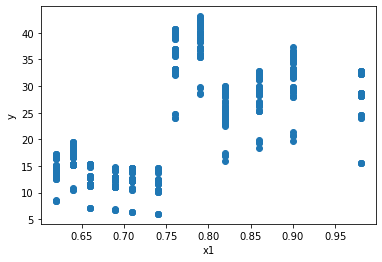

In [15]:
import matplotlib.pyplot as plt
plt.scatter(mydata.X1, mydata.Y1)
plt.xlabel('x1')
plt.ylabel('y')

In [30]:
x = np.array(mydata.X1).reshape((-1, 1))
y = np.array(mydata.Y1)

Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

## Step 3: Create a model and fit it

This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression:

- fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).
- normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
- copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
- n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.
This example uses the default values of all parameters.

In [31]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model.

## Step 4: Get results

In [32]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.3872223619321592
intercept: -23.053014060655016
slope: [59.35905261]


When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².
The code above illustrates how to get 𝑏₀ and 𝑏₁. You can notice that .intercept_ is a scalar, while .coef_ is an array.

## Step 5: Predict response

In [33]:
y_pred = model.predict([[0.8],[0.9],[1.0]])
print('predicted response:', y_pred, sep='\n')

predicted response:
[24.43422803 30.37013329 36.30603855]


# <font color = #4854E8> Linear Regression With Keras Tansorflow </font>

In [34]:
import tensorflow as tf
import keras

## Step 1: Define and Compile the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [35]:
model2 = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model2.compile(optimizer='sgd', loss='mean_squared_error')
model2.fit(x, y, epochs=1000, verbose=0)

## Step 2: Obtain Parameters/weights

In [36]:
model2.weights

[<tf.Variable 'dense_5/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[57.70134]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-21.813543], dtype=float32)>]

## Step 3: Predict response

In [37]:
print(model2.predict([[0.8],[0.9],[1.0]]))

1/1 [==============================] - 0s 48ms/step
[[24.347528]
 [30.117662]
 [35.887794]]


# <font color = #4854E8> Linear Regression with statsmodels </font>

You can implement linear regression in Python relatively easily by using the package statsmodels as well. Typically, this is desirable when there is a need for more detailed results.

The procedure is similar to that of scikit-learn.

In [38]:
# import library
import statsmodels.api as sm

# add column of one
x_with_one = sm.add_constant(x)

You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. It doesn’t takes 𝑏₀ into account by default. That’s how you add the column of ones to x with add_constant(). It takes the input array x as an argument and returns a new array with the column of ones inserted at the beginning.

In [41]:
# Create a model and fit it
model3 = sm.OLS(y, x_with_one)
results = model3.fit()

You should be careful here! Please, notice that the first argument is the output, followed with the input. There are several more optional parameters.

By calling .fit(), you obtain the variable results, which is an instance of the class statsmodels.regression.linear_model.RegressionResultsWrapper. This object holds a lot of information about the regression model.

In [42]:
# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     484.0
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.59e-83
Time:                        16:02:20   Log-Likelihood:                -2676.5
No. Observations:                 768   AIC:                             5357.
Df Residuals:                     766   BIC:                             5366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.0530      2.081    -11.076      0.0

# <font color = #4854E8> Linear Regression Manually </font>

In [53]:
x_x = np.linalg.inv(np.dot(x_with_one.T,x_with_one))
x_y = np.dot(x_with_one.T,y)
beta = np.dot(x_x,x_y)
beta

array([-23.05301406,  59.35905261])

## Multiple Linear Regression With statmodels



In [55]:
# define new data
X = mydata[["X1","X2","X3","X4","X5","X6","X7","X8"]].to_numpy()
X = sm.add_constant(X)

# Create a model and fit it
model4 = sm.OLS(y, X)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:26:19   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0134     19.034      4.414      0.0

## Detecting Multicollinearity with VIF

In [56]:
# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor (VIF).

In [57]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = mydata.drop(["Y1","Y2"], axis=1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(mydata.drop(["Y1","Y2"], axis=1).values, i)
                          for i in range(len(mydata.drop(["Y1","Y2"], axis=1).columns))]
                          
print(vif_data)

  feature         VIF
0      X1  168.948751
1      X2         inf
2      X3         inf
3      X4         inf
4      X5  134.035782
5      X6   10.796725
6      X7    4.293656
7      X8    4.496320


C:\Users\rauzan\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Multiple Linear Regression Model After Droping Multicollinearity Variables

In [ ]:
# define new data
Xclean = mydata[["X1","X3","X4","X5","X6","X7","X8"]].to_numpy()
Xclean = sm.add_constant(Xclean)

# Create a model and fit it
model4 = sm.OLS(y, Xclean)
results = model4.fit()

# Get results
print(results.summary())

# StepWise, L1, L2, & ElasticNet Regression with scikit-learn ?